In [3]:
import numpy as np
from matplotlib import pyplot as plt 
from pandas import read_csv
import sys
import os
from matplotlib import rcParams
import toml

from correlations import *
from read_in_data import *
from mass_fit import *
from mass_matteo import *
from functions import *

%load_ext autoreload
%autoreload 2

In [8]:
param = ("fermions", "fermion_mass")
simulations = []
for i in range(2, 22):
    dataset = Dataset(16, 16)
    dataset.add_data("./data/conf" + str(i) + "/", p, 0)
    simulations.append(dataset)
for i in range(56, 77):
    dataset = Dataset(16, 16)
    dataset.add_data("./data/conf" + str(i) + "/", p, 0)
    simulations.append(dataset)

0.024240506148008892 3.2686765752137825
0.05930439875569367 1.7599434012472421
0.08279111301270367 1.4862228736966048
0.10087479257926397 1.3395669367119598
0.11586440351247312 1.2278372915612488
0.1348911776809866 1.0671588153019826
0.1516099821529837 0.9386566966788124
0.1707253660568151 0.8062413161020879
0.18667181414350617 0.7098140275477797
0.20228235177087442 0.6232989104469894
0.21851026626245615 0.5425877230920678
0.23440429725732026 0.4733818424425386
0.25072783185942066 0.4106163327253552
0.26599310045941676 0.36035361218694345
0.28087883437418165 0.31552325119355484
0.2952793034960311 0.2775049613664667
0.3095968058518811 0.24437528348978024
0.324998199352286 0.2135084974792412
0.3388707814966944 0.18859913684162932
0.35372936784687903 0.1655808102094176
0.034602640513695306 2.271200632558878
critical mass: -0.05486754668215925


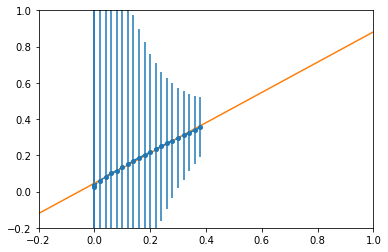

In [26]:
data = []
for sim in simulations:
    
    try:
        if (sim.toml_params[param[0]][param[1]] >= 0):
            val, err = sim.compute_mqphys(printing=False)
            data.append((sim.toml_params[param[0]][param[1]], val, err))
            params, vals, errs = sort_data(data)
    except:
        pass

plt.errorbar(params, vals, errs, fmt='o--', markersize=4)

m, b = np.polyfit(params, vals, 1)
print("critical mass:", -b/m)
xline = np.linspace(-0.2, 1.0, 1000)
plt.plot(xline, m*xline + b)

plt.xlim([-0.2,1])
plt.ylim([-0.2,1.0])
plt.show()